In [1]:
from stereo3d import stereo3d_read_from_zips as std_read
from parsivel import pars_read_from_zips as pars_read
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from pathlib import Path
import numpy as np 
stereo_datafolder = "/home/marcio/stage_project/data/Daily_raw_data_3D_stereo"
pars_datafolder = "/home/marcio/stage_project/data/Pars_1"
beg = 20230821000000
end = 20231022235930

# Read all the data and extract one event

In [2]:
# Read the main parsivel series
parsivel_series = pars_read(beg, end, pars_datafolder)
stereo_series = std_read(beg, end, stereo_datafolder)

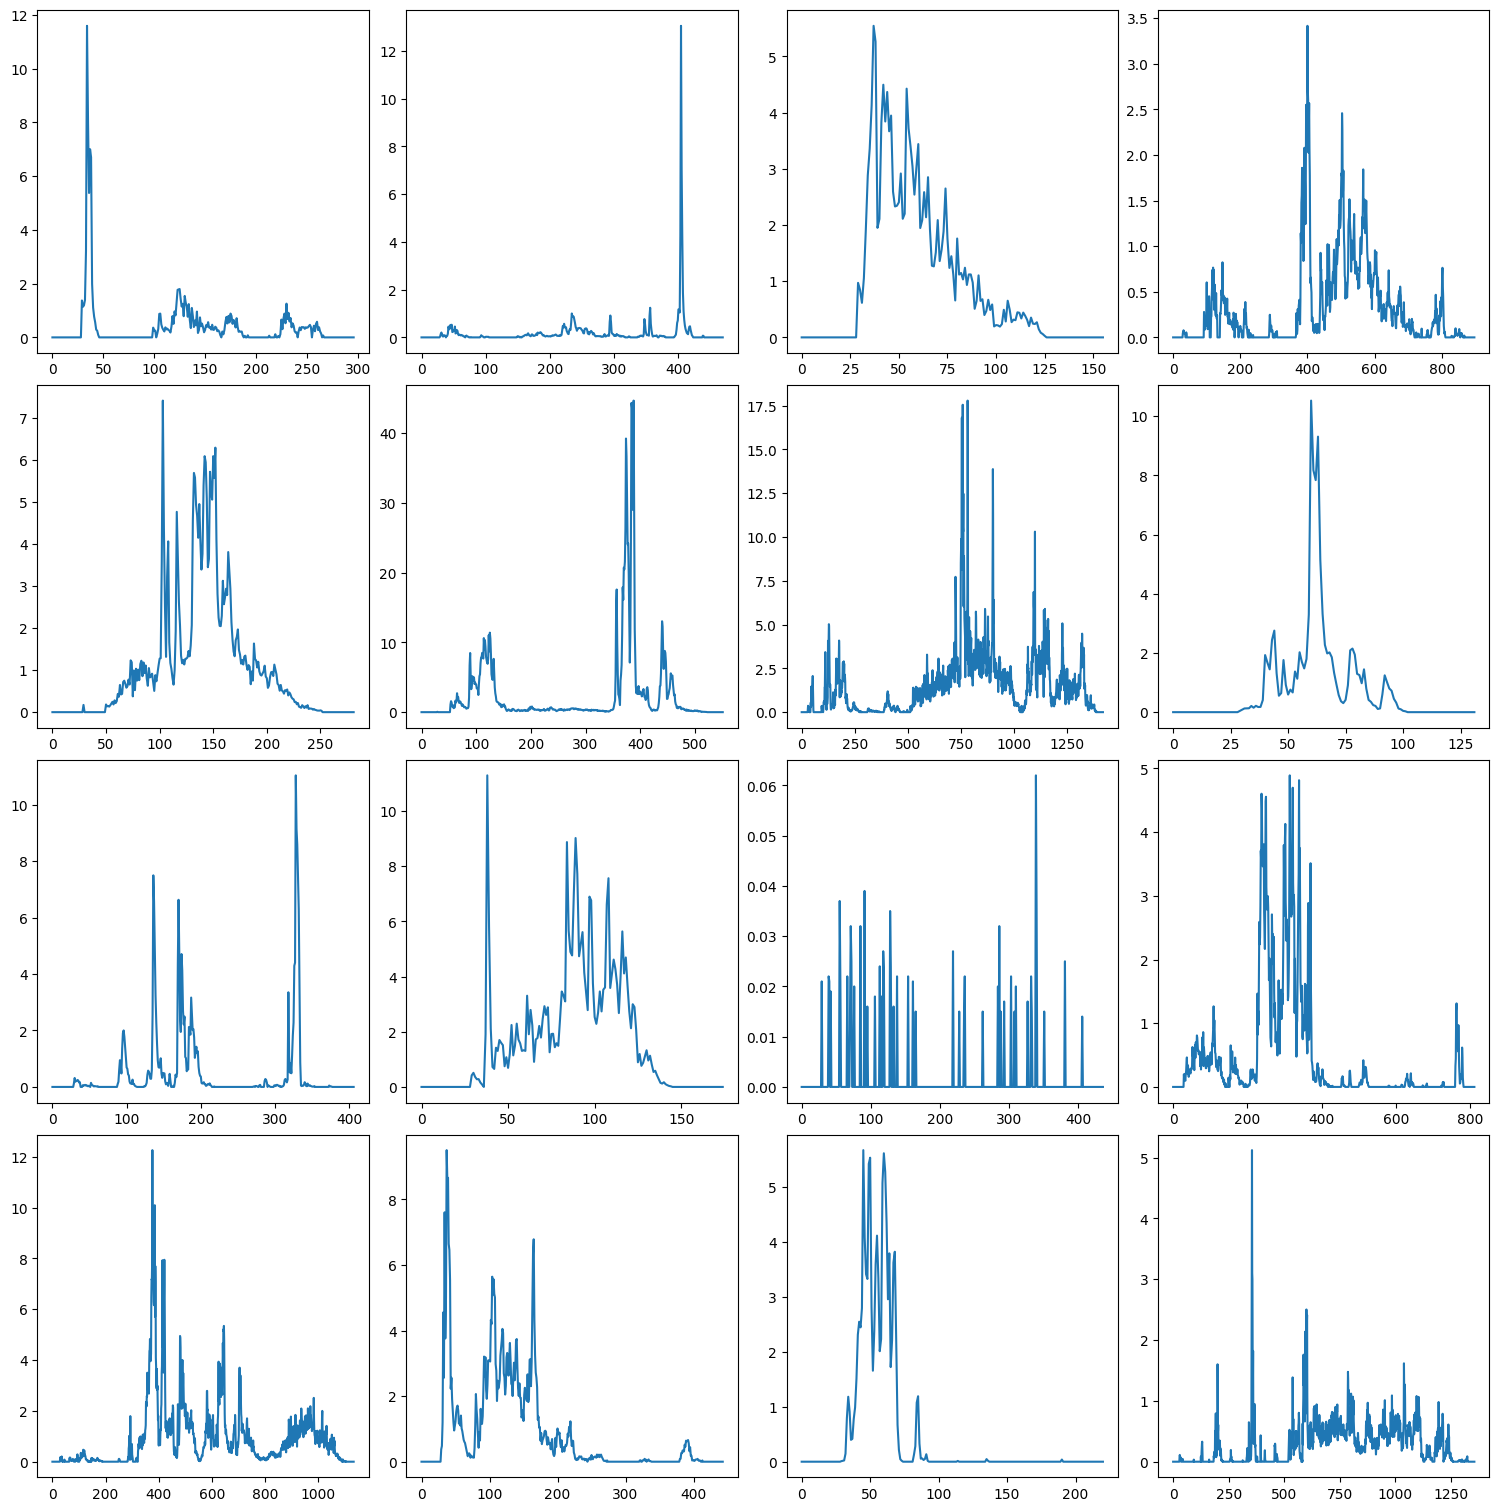

In [8]:
parsivel_events = parsivel_series.exstract_events(30, 15, 0.7)
n = int(np.ceil(len(parsivel_events)**0.5))
figure = plt.figure()
figure.set_size_inches((n*3 +3, n*3 + 3))
figure.set_constrained_layout(True)
for i, event in enumerate(parsivel_events):
    ax = figure.add_subplot(n,n, i + 1)
    ax.plot(event.rain_rate)

#### Select event from Stereo 3D

In [9]:
stereo_events = stereo_series.extract_events([pars_event.duration for pars_event in parsivel_events])
[pars_event.duration for pars_event in parsivel_events], [pars_event.duration for pars_event in stereo_events]

([(1692868500, 1692877380),
  (1692943470, 1692957540),
  (1693217640, 1693222290),
  (1693466190, 1693493100),
  (1694503950, 1694512380),
  (1694515830, 1694532360),
  (1695251220, 1695293760),
  (1695355470, 1695359400),
  (1696305870, 1696318050),
  (1697084880, 1697090100),
  (1697560680, 1697573760),
  (1697620560, 1697644890),
  (1697742210, 1697776200),
  (1697815170, 1697828460),
  (1697838300, 1697844900),
  (1697882250, 1697922930)],
 [(1692868500, 1692877380),
  (1692943470, 1692957540),
  (1693217640, 1693222290),
  (1693466190, 1693493100),
  (1694503950, 1694512380),
  (1694515830, 1694532360),
  (1695251220, 1695293760),
  (1695355470, 1695359400),
  (1696305870, 1696318050),
  (1697084880, 1697090100),
  (1697560680, 1697573760),
  (1697620560, 1697644890),
  (1697742210, 1697776200),
  (1697815170, 1697828460),
  (1697838300, 1697844900),
  (1697882250, 1697922930)])

### Save the event for stereo 3D and parsivel

NameError: name 'parsivel_events' is not defined

In [10]:
pars_folder = Path("/home/marcio/stage_project/data/saved_events/pars_events")
stereo_folder = Path("/home/marcio/stage_project/data/saved_events/stereo_events")
for i, (pars_event, stereo_event) in enumerate(zip(parsivel_events, stereo_events)):
    pars_event.to_pickle(pars_folder / f"event{i+1:>02}.obj")
    stereo_event.to_pickle(stereo_folder / f"event{i+1:>02}.obj")